# Data augmentation
If you know CNNs, you'll be aware that they are scale or rotation invariant. This implies that when a CNN's weights are trained and optimised on a set of images, if that same CNN is used to classify those images, rotated, scaled, zoomed or in a different contrast, it'll likely misclassify it. 

In [1]:
# Import necessary packages.
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

# Important constants
IMAGE_SIZE = 224
BATCH_SIZE = 8

Tensorflow has a fantastic data pipeline which can be used to load a dataset, and perform all sort of transformation on said dataset. 

In [2]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    r"C:\Users\ifunanyaScript\Everything\BrainTumour_DiagnosisApp\data\clean_dataset",
    shuffle = True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = (BATCH_SIZE),
)

Found 3000 files belonging to 2 classes.


The above api scans the directory path passed as an argument.  
Then, stores the sub directory(s) names as classes/labels and all the corresponding files as images belonging to their respective classes.

In [3]:
label_names = dataset.class_names
label_names

['no_tumour', 'tumour']

When the dataset is loaded, it is batched into sizes as specified by the __"batch_size"__ parameter. In this case, 3000 images batched into sizes of 32, should be around 375 batches and that would be the length of the dataset.

In [4]:
len(dataset)

375

Viewing samples of this dataset can be done by iterating over batches. We can plot the samples in one batch as follows;

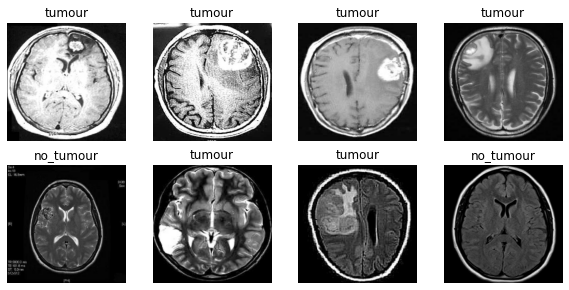

In [5]:
# Increase the size of the plot for better display.
plt.figure(figsize=(10, 10))

# Use .take(_) to get one batch from the entire dataset.
# Each batch contains a batch of images and a batch of labels in accordance to each other.
for image_batch, label_batch in dataset.take(1):
    # Plot the first 16 images in this batch.
    for i in range(8):
        plt.subplot(4, 4, i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(label_names[label_batch[i]])
        plt.axis("off")

There is randomness in the samples as a result of the __"shuffle"__ parameter specified.

## Augmentations
Augmenting images implies generating new image samples from an original image sample. There are several types of image augmentations. To make a CNN more sophisticated, one might require a cropped image, a brighter image, a resized image, a flipped image, a translated sample, etc. Hence, we augment our original images to generate other kinds of images to meet our needs.

###### Resizing.

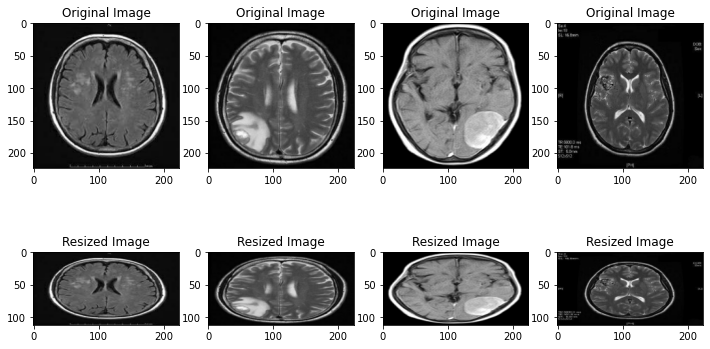

In [6]:
resize = layers.experimental.preprocessing.Resizing(112, IMAGE_SIZE)

# To show original images vs resize images.
fig, ax = plt.subplots(2, 4, figsize=(12, 6.5))

for images, labels in dataset.take(1):
    for i in range(4):
        # Original Images.
        ax[0][i].imshow(images[i].numpy().astype("uint8"))
        ax[0][i].set_title("Original Image")
        
        # Resized Images.
        ax[1][i].imshow(resize(images[i]).numpy().astype("uint8"))
        ax[1][i].set_title("Resized Image")

plt.show()

The original images are in 256x256 pixels, observing from the axes, we can see that they are now in 112x224.

###### Random Height, Width and Zoom.

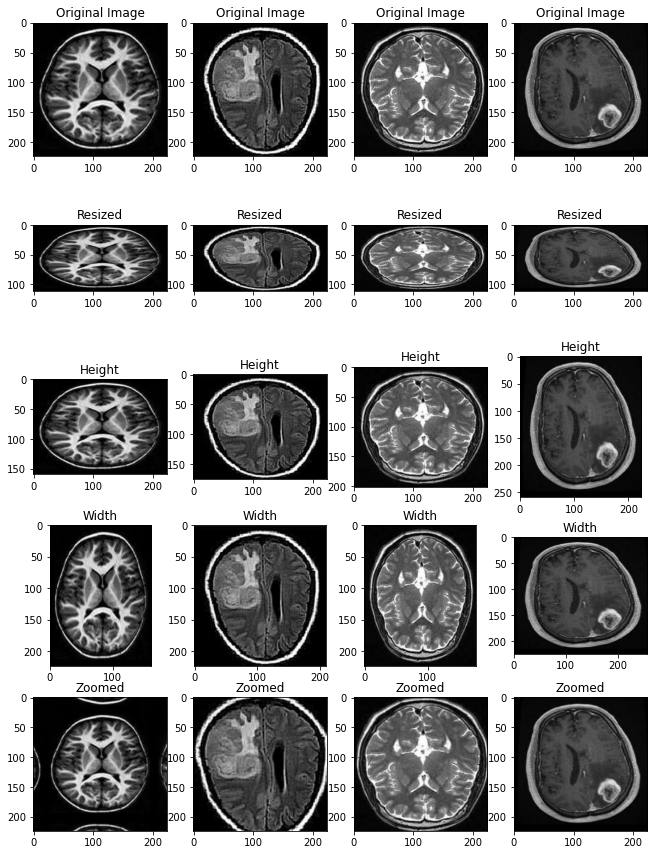

In [7]:
resize = layers.experimental.preprocessing.Resizing(112, IMAGE_SIZE)
height = layers.experimental.preprocessing.RandomHeight(0.3)
width = layers.experimental.preprocessing.RandomWidth(0.3)
zoom = layers.experimental.preprocessing.RandomZoom(0.3)

# To show original images and augmented images.
fig, ax = plt.subplots(5, 4, figsize=(11, 15))
for images, labels in dataset.take(1):
    for i in range(4):
        # Original Images.
        ax[0][i].imshow(images[i].numpy().astype("uint8"))
        ax[0][i].set_title("Original Image")
        
        # Resize.
        ax[1][i].imshow(resize(images[i]).numpy().astype("uint8"))
        ax[1][i].set_title("Resized")
        
        # Height.
        ax[2][i].imshow(height(images[i]).numpy().astype("uint8"))
        ax[2][i].set_title("Height")
        
        # Width.
        ax[3][i].imshow(width(images[i]).numpy().astype("uint8"))
        ax[3][i].set_title("Width")
        
        # Zoom.
        ax[4][i].imshow(zoom(images[i]).numpy().astype("uint8"))
        ax[4][i].set_title("Zoomed")

plt.show()

###### Random Flip, Crop, Rotation and Translation.

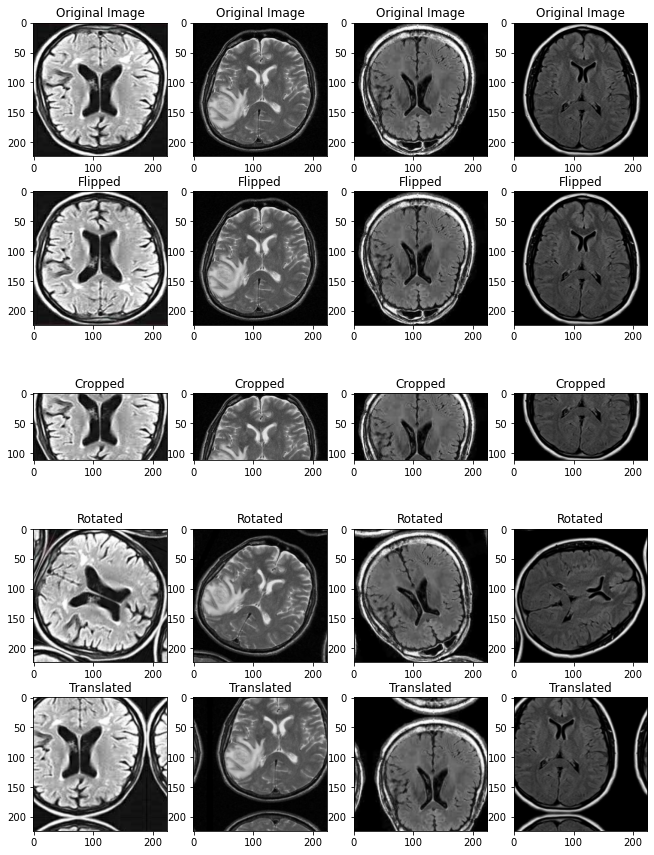

In [8]:
flip = layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical")
crop = layers.experimental.preprocessing.RandomCrop(112, 224)
rotation = layers.experimental.preprocessing.RandomRotation(0.2)
translation = layers.experimental.preprocessing.RandomTranslation(0.2, 0.2)

# To show original images and augmented images.
fig, ax = plt.subplots(5, 4, figsize=(11, 15))
for images, labels in dataset.take(1):
    for i in range(4):
        # Original Images.
        ax[0][i].imshow(images[i].numpy().astype("uint8"))
        ax[0][i].set_title("Original Image")
        
        # Flip.
        ax[1][i].imshow(flip(images[i]).numpy().astype("uint8"))
        ax[1][i].set_title("Flipped")
        
        # Crop.
        ax[2][i].imshow(crop(images[i]).numpy().astype("uint8"))
        ax[2][i].set_title("Cropped")
        
        # Rotate.
        ax[3][i].imshow(rotation(images[i]).numpy().astype("uint8"))
        ax[3][i].set_title("Rotated")
        
        # Translate.
        ax[4][i].imshow(translation(images[i]).numpy().astype("uint8"))
        ax[4][i].set_title("Translated")

plt.show()

###### Random Brightness and Contrast

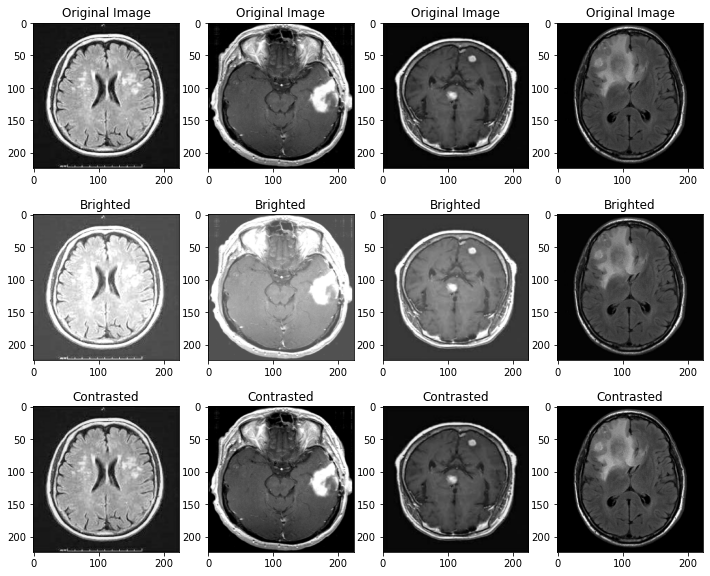

In [9]:
brightness = layers.RandomBrightness([-0.5, 0.5])
contrast = layers.experimental.preprocessing.RandomContrast(0.2)

# To show original images and augmented images.
fig, ax = plt.subplots(3, 4, figsize=(12, 10))
for images, labels in dataset.take(1):
    for i in range(4):
        # Original Images.
        ax[0][i].imshow(images[i].numpy().astype("uint8"))
        ax[0][i].set_title("Original Image")
        
        # Brightness.
        ax[1][i].imshow(brightness(images[i]).numpy().astype("uint8"))
        ax[1][i].set_title("Brighted")
        
        # Contrast.
        ax[2][i].imshow(contrast(images[i]).numpy().astype("uint8"))
        ax[2][i].set_title("Contrasted")

plt.show()

However, selection of augmentation types is dependent on the kind of images one is trying to classify. In the case of Brain MRI scans, these kind of images could come in a varying contrast, varying brightness, varying perspective and sometimes varying rotation. Hence, it is smart to base the type of augmentation on these muddles.  
<br>
<br>
Also, we could wrap all the augmentation types as a Keras Sequential layer.

In [10]:
data_augmentation = tf.keras.Sequential([
    layers.RandomBrightness([-0.3, 0.3]),
    layers.experimental.preprocessing.RandomContrast(0.6),
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.3)
])

When utilizing a CNN model, one could also want to classify an image that isn't of the dimension of the images in the training dataset. _i.e_ The images in the training dataset are of dimension (256, 256), so the CNN is accustomed to this dimension, now it will have a problem with another image that is of a varying dimension like (125, 345).  
Hence, a resize and rescale layer should be added to the model, so that any image coming in with a varying dimesion is addressed before the model classifies it.

In [11]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

Proceed to the next notebook... __Model building.__

In [12]:
# ifunanyaScript